In [ ]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import os
%matplotlib inline

In [ ]:
#Path to Files
from google.colab import drive
import os
drive.mount('/content/gdrive')

#authentication key will ask you to log in, this ensures the user has to sign in, 
# folder access only allowed to ucsd users. 

Mounted at /content/gdrive


In [ ]:
# check path
!ls gdrive/Shareddrives/Cogs118BFinalProject/

sketches_fc6_nopca.npy	sketches_metadata.csv	  sketches_raw_nopca.npy
sketches_fc6_pca.npy	sketches_metadata.gsheet  sketches_raw_pca.npy


In [ ]:
# show a list of the filenames in our shared drive
path_to_directory = 'gdrive/Shareddrives/Cogs118BFinalProject/'
files = os.listdir(path_to_directory)
files

['sketches_raw_pca.npy',
 'sketches_raw_nopca.npy',
 'sketches_metadata.csv',
 'sketches_fc6_pca.npy',
 'sketches_fc6_nopca.npy',
 'sketches_metadata.gsheet']

In [ ]:
path = os.path.join(path_to_directory, files[1])
raw_nopca = np.load(path)
print("type: ", type(raw_nopca))
print("shape: ", np.shape(raw_nopca))

type:  <class 'numpy.ndarray'>
shape:  (12288, 50176)


(50176,)
(224, 224)


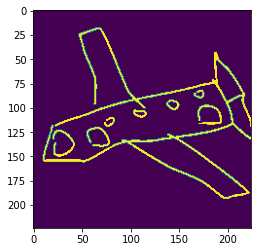

In [ ]:
#plot something from nopca
sample = raw_nopca[93, :]
print(np.shape(sample))
sample = sample.reshape((224,  224))
print(np.shape(sample))
plt.imshow(sample)

type:  <class 'numpy.ndarray'>
shape:  (12288, 100)
(10, 10)


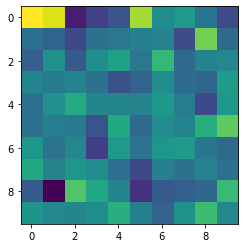

In [ ]:
#plot an example from pca 
path = os.path.join(path_to_directory, files[0])
raw_pca = np.load(path)
print("type: ", type(raw_pca))
print("shape: ", np.shape(raw_pca))
sample = raw_pca[0, :]
sample = sample.reshape((10,  10))
print(np.shape(sample))
plt.imshow(sample)

type:  <class 'numpy.ndarray'>
shape:  (12288, 4096)
(64, 64)


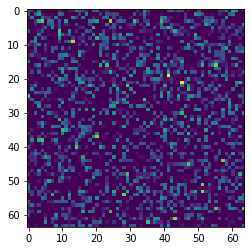

In [ ]:
#plot an example from the fc6_nopca 
path = os.path.join(path_to_directory, files[4])
fc6_nopca = np.load(path)
print("type: ", type(fc6_nopca))
print("shape: ", np.shape(fc6_nopca))
sample = fc6_nopca[0, :]
sample = sample.reshape((64,  64))
print(np.shape(sample))
plt.imshow(sample)

type:  <class 'numpy.ndarray'>
shape:  (12288, 100)
(10, 10)


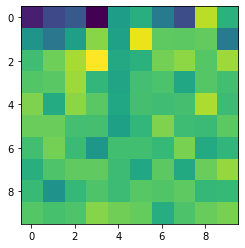

In [ ]:
#plot an example from the fc6_nopca 
path = os.path.join(path_to_directory, files[3])
fc6_pca = np.load(path)
print("type: ", type(fc6_pca))
print("shape: ", np.shape(fc6_pca))
sample = fc6_pca[0, :]
sample = sample.reshape((10,  10))
print(np.shape(sample))
plt.imshow(sample)

In [ ]:
metaData = pd.read_csv(os.path.join(path_to_directory, files[2]))
metaData

,category,raw_sketch_ind,fc6_sketch_ind,raw_sketch_pca_ind,fc6_sketch_pca_ind
0,airplane,15,11295,15,11295
1,airplane,34,5889,34,5889
2,airplane,93,916,93,916
3,airplane,111,455,111,455
4,airplane,150,12195,150,12195
...,...,...,...,...,...
12283,window,12131,7219,12131,7219
12284,window,12188,10992,12188,10992
12285,window,12223,1674,12223,1674
12286,window,12232,8194,12232,8194


In [ ]:
# create new column called category_factored by transforming cateogry column 
# with an encoder
from sklearn.preprocessing import LabelEncoder
metaData['category_factored'] = LabelEncoder().fit_transform(metaData.category)
metaData


,category,raw_sketch_ind,fc6_sketch_ind,raw_sketch_pca_ind,fc6_sketch_pca_ind,category_factored
0,airplane,15,11295,15,11295,0
1,airplane,34,5889,34,5889,0
2,airplane,93,916,93,916,0
3,airplane,111,455,111,455,0
4,airplane,150,12195,150,12195,0
...,...,...,...,...,...,...
12283,window,12131,7219,12131,7219,32
12284,window,12188,10992,12188,10992,32
12285,window,12223,1674,12223,1674,32
12286,window,12232,8194,12232,8194,32


In [ ]:
feature_set = [raw_nopca, fc6_nopca, raw_pca, fc6_pca]
labels_set  = [metaData.sort_values(col).category_factored.values 
               for col in metaData.drop(columns=['category', 'category_factored']).columns]

In [ ]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics.cluster import fowlkes_mallows_score

model = MiniBatchKMeans().fit(feature_set[3])
print(fowlkes_mallows_score(labels_set[3], model.labels_))

0.06793044469823496


In [ ]:
from collections import defaultdict 
from sklearn.cluster import KMeans

d = defaultdict(lambda: 0)
for i in [4, 8, 12, 16, 32]: # num clusters
  for j in [10, 25, 50, 100]: #n_init
    model = KMeans(n_clusters=i, n_init=j).fit(feature_set[3])
    d[i, j] =  fowlkes_mallows_score(labels_set[3], model.labels_)
    print(f'{j}, {i}: ', fowlkes_mallows_score(labels_set[3], model.labels_))

10, 4:  0.08999204952238302
25, 4:  0.08999321640478848
50, 4:  0.08999457738397736
100, 4:  0.08998483075783373
10, 8:  0.06709355079173614
25, 8:  0.06712003686985799
50, 8:  0.06712977372787021
100, 8:  0.06712562239915174
10, 12:  0.0535612134137854
25, 12:  0.05344385654545917
50, 12:  0.05422404322847988
100, 12:  0.0540673165639169
10, 16:  0.04685846311731024
25, 16:  0.046833269868839615
50, 16:  0.04693687043156201
100, 16:  0.04657980893720706
10, 32:  0.032896964164682366
25, 32:  0.03308033730456582
50, 32:  0.0330111679677178
100, 32:  0.033166108025834425


In [ ]:
 # format of output is (num_clusters, batch size): fowlkes_mallows score
 # entries are sorted from largest to smallest
sortedlist = sorted(d.items(), key=lambda x:x[1])
sorteddict = dict(sortedlist)
sorteddict

{(4, 10): 0.08999204952238302,
 (4, 25): 0.08999321640478848,
 (4, 50): 0.08999457738397736,
 (4, 100): 0.08998483075783373,
 (8, 10): 0.06709355079173614,
 (8, 25): 0.06712003686985799,
 (8, 50): 0.06712977372787021,
 (8, 100): 0.06712562239915174,
 (12, 10): 0.0535612134137854,
 (12, 25): 0.05344385654545917,
 (12, 50): 0.05422404322847988,
 (12, 100): 0.0540673165639169,
 (16, 10): 0.04685846311731024,
 (16, 25): 0.046833269868839615,
 (16, 50): 0.04693687043156201,
 (16, 100): 0.04657980893720706,
 (32, 10): 0.032896964164682366,
 (32, 25): 0.03308033730456582,
 (32, 50): 0.0330111679677178,
 (32, 100): 0.033166108025834425}

In [ ]:
# redoing above but nicer

cols = metaData.drop(columns=['category', 'category_factored']).columns.values
FMI = dict()
for i, feature in enumerate(cols):
    model = KMeans(n_clusters = 32).fit(feature_set[i])
    FMI[feature[:-4]] = fowlkes_mallows_score(labels_set[i], model.labels_)
    print(f'On feature {feature[:-4]}, score: {FMI[feature[:-4]]}')

On feature raw_sketch, score: 0.10313105253691483
On feature fc6_sketch, score: 0.03348551511177662
On feature raw_sketch_pca, score: 0.0709553066456021
On feature fc6_sketch_pca, score: 0.03292435211865361


# Ignore below... old code

In [ ]:
#iterate and create a labeled dataset 
labels = np.zeros(np.shape(raw_nopca)[0], dtype='<U20')
print("Zero-filled labels", np.shape(labels))
# convert data to dataframe 
for ind in metaData.index: 
  index = metaData['raw_sketch_ind'][ind]
  label = metaData['category'][ind]
  labels[index] = label
labels 

Zero-filled labels (12288,)


array(['windmill', 'axe', 'snake', ..., 'snake', 'butterfly', 'hotdog'],
      dtype='<U20')

In [ ]:
# lets build our training and test set 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(raw_nopca, labels)
print("X-Train Shape:", np.shape(X_train))
print("X-Test Shape:", np.shape(X_test))
print("y-Train Shape:", np.shape(y_train))
print("y-Test Shape:", np.shape(y_test))

X-Train Shape: (9216, 50176)
X-Test Shape: (3072, 50176)
y-Train Shape: (9216,)
y-Test Shape: (3072,)


blimp
(50176,)


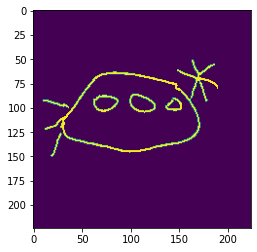

In [ ]:
sample = X_train[0, :]
print(y_train[0])
print(np.shape(sample))
sample = sample.reshape((224, 224))
plt.imshow(sample)